Part 2: Depth from Rectified Stereo Images

Write a program to estimate a depth map from the pair of rectified images in Figure 2 using an MRF and multiple label graphcuts.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gco 

image_l = cv2.imread('./Fig_left.png',cv2.IMREAD_COLOR)
image_l = cv2.cvtColor(image_l, cv2.COLOR_BGR2RGB)
image_r = cv2.imread('./Fig_right.png',cv2.IMREAD_COLOR)
image_r = cv2.cvtColor(image_r, cv2.COLOR_BGR2RGB)
h ,w, d=image_l.shape
# image=cv2.imread('./Figure2.png',cv2.IMREAD_COLOR)
# image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# h_, w_ ,d= image.shape
# middle=w_//2
# image_l= image[:h_, :middle-3:]
# h_l, w_l,_= image_l.shape
# image_r= image[:h_, middle+2:middle+2+w_l,:]
# h_r, w_r,_= image_r.shape

# print(w_l, w_r)
# assert w_l==w_r , 'value middle not in the middle'



def get_edges_and_weights(l_image, m_lambda, disparity):
    h, w, d = l_image.shape
    # h, w= 10, 10
    E = (h - 1) * w + h * (w - 1)
    edges = np.empty((E, 2), dtype=np.int32)
    edge_weights = np.ones(E, dtype=np.float)
    for i in range(len(edge_weights)):
        edge_weights[i]=m_lambda
    idx = 0
    for row in range(h):
        edges[idx:idx+w-1,0] = np.arange(w-1) + row * w
        edges[idx:idx+w-1,1] = np.arange(w-1) + row * w + 1
        idx += w-1

    # vertical edges
    for col in range(w):
        edges[idx:idx+h-1,0] = np.arange(0, (h-1)*w, w) + col
        edges[idx:idx+h-1,1] = np.arange(w, h*w, w) + col
        idx += h-1
    return [edges, edge_weights]


/home/frank62/miniconda3/envs/depth/lib/python3.9/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


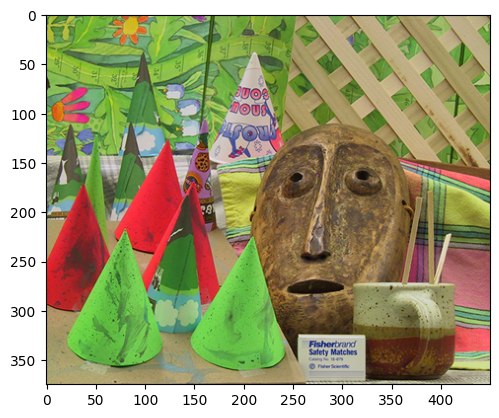

In [2]:
plt.imshow(image_r)

In [2]:
def measure_depth(left_image,right_image,disparity,m_lambda):
    perior = np.zeros((disparity, disparity))
    for i in range(0, disparity):
        for j in range(0, disparity):
            perior[i][j] = abs(i-j)
    smooth=1-np.eye(disparity)
    fp = np.zeros([disparity,disparity])
    for d_x in range(disparity):
        for d_y in range(disparity):
                fp[d_x,d_y] = abs(d_x-d_y)
    h_l, w_l,_= left_image.shape
    Mk_f=np.zeros([h_l*w_l,disparity])
    for row in range (h_l):
        for col in range (w_l):
            for d in range(disparity):
                if d<=col:
                   Mk_f[row*w_l+col][d]=np.sum(np.abs(left_image[row][col]-right_image[row][col-d])**2)/3
                else:
                   Mk_f[row*w_l+col][d]=np.sum(np.abs(left_image[row][col]-right_image[row][0])**2)/3
    edges, edge_weights=get_edges_and_weights(left_image, m_lambda , disparity)
    print(edges, edge_weights)
    labels = gco.cut_general_graph(edges, edge_weights, Mk_f, smooth, n_iter=-1)
    # labels=gco.cut_grid_graph_simple(Mk_f, smooth*0.5, n_iter=-1)
    labels = labels.reshape(h_l,w_l)    
    plt.imshow(labels,'gray')      
    
    

2. Show your best result and provide some discussion if necessary (particularly if the results are not as good as expected).

[[     0      1]
 [     1      2]
 [     2      3]
 ...
 [167399 167849]
 [167849 168299]
 [168299 168749]] [1. 1. 1. ... 1. 1. 1.]
[[     0      1]
 [     1      2]
 [     2      3]
 ...
 [167399 167849]
 [167849 168299]
 [168299 168749]] [5. 5. 5. ... 5. 5. 5.]
[[     0      1]
 [     1      2]
 [     2      3]
 ...
 [167399 167849]
 [167849 168299]
 [168299 168749]] [10. 10. 10. ... 10. 10. 10.]
[[     0      1]
 [     1      2]
 [     2      3]
 ...
 [167399 167849]
 [167849 168299]
 [168299 168749]] [50. 50. 50. ... 50. 50. 50.]
[[     0      1]
 [     1      2]
 [     2      3]
 ...
 [167399 167849]
 [167849 168299]
 [168299 168749]] [70. 70. 70. ... 70. 70. 70.]


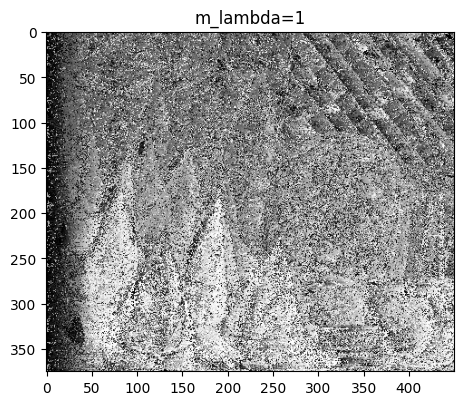

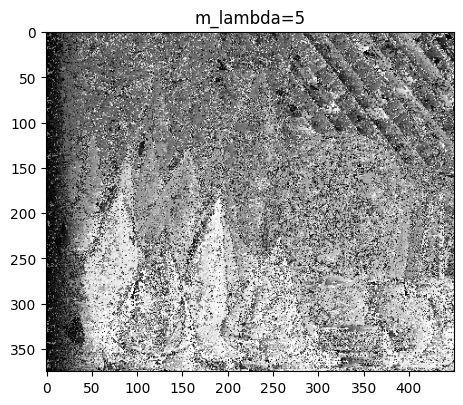

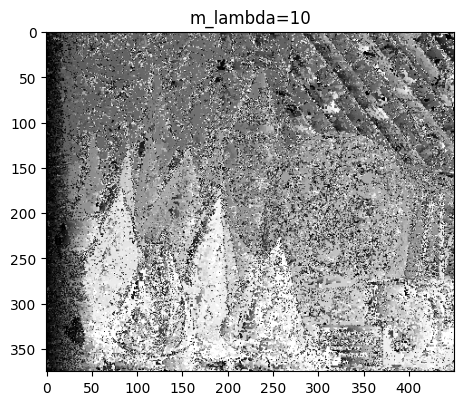

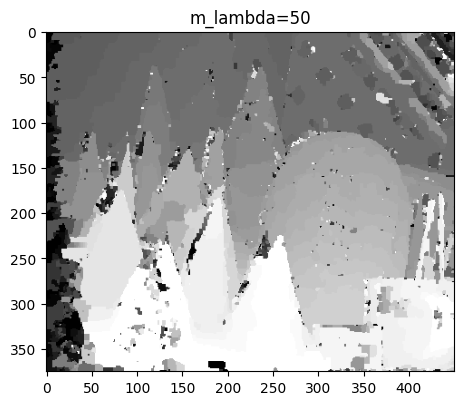

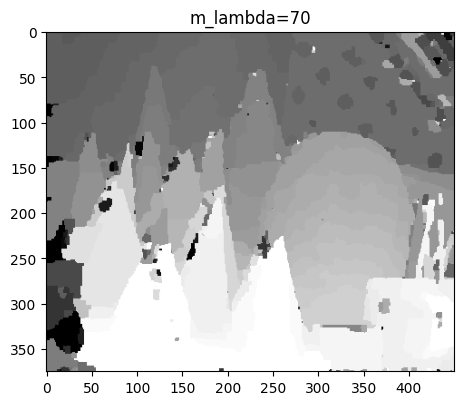

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.title('m_lambda=1')
measure_depth(left_image=image_l, right_image=image_r,disparity=50,m_lambda=1)
plt.figure(figsize=(15,15))
plt.subplot(322)
plt.title('m_lambda=5')
measure_depth(left_image=image_l, right_image=image_r,disparity=50,m_lambda=5)
plt.figure(figsize=(15,15))
plt.subplot(323)
plt.title('m_lambda=10')
measure_depth(left_image=image_l, right_image=image_r,disparity=50,m_lambda=10)
plt.figure(figsize=(15,15))
plt.subplot(324)
plt.title('m_lambda=50')
measure_depth(left_image=image_l, right_image=image_r,disparity=50,m_lambda=50)
plt.figure(figsize=(15,15))
plt.subplot(325)
plt.title('m_lambda=70')
measure_depth(left_image=image_l, right_image=image_r,disparity=50,m_lambda=70)

[[     0      1]
 [     1      2]
 [     2      3]
 ...
 [167399 167849]
 [167849 168299]
 [168299 168749]] [70. 70. 70. ... 70. 70. 70.]


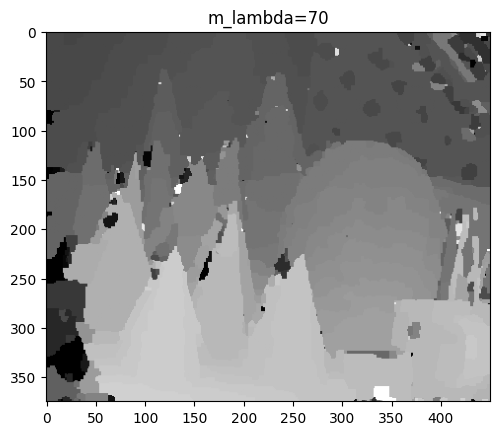

In [3]:
plt.title('m_lambda=70')
measure_depth(left_image=image_l, right_image=image_r,disparity=65,m_lambda=70)

Discussion: 

According to the depth images generated @ m_lambda= 1, 5, 10, 50, 70 the disparity map become more clear as bigger m_lambda helps denoisin the depth map, however, like in part 1, larger m_lambda will leads to the loss of detailed inforations (Bluring).

On the other hand, the result of graph cut also depends on the max of disparity value, increase disparity from 50 to 80 will optimize the graph better.

The reason why the depth result is not as good as it should be can be attributed to two factors:

1. m_lambda is a constant value amoung edge_weights, these can be different
2. disparity is a parameter defined by myself, d_min d_max can be optimized by analyzing the pixel difference between left and right image.


Below shows the best reuslt so far achieved (disparity=60, m_lambda=65)

[[     0      1]
 [     1      2]
 [     2      3]
 ...
 [167399 167849]
 [167849 168299]
 [168299 168749]] [65. 65. 65. ... 65. 65. 65.]


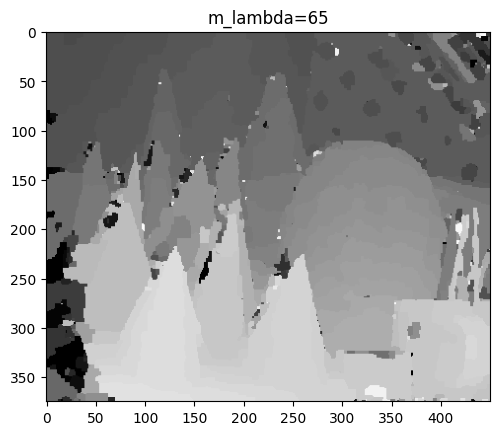

In [9]:
plt.title('m_lambda=65')
measure_depth(left_image=image_l, right_image=image_r,disparity=60,m_lambda=65)